In [1]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def uniform_hypersphere(d):
    # sample a point uniformly from d-1 sphere
    x = np.random.randn(d)
    x /= np.linalg.norm(x)
    return x

In [3]:
def y_sample(D, c, X):
    y = X @ (D @ c) # no noise added
    return y
def X_sample(n, d, distribution_sample):
    # a n \times d matrix with each row sampled according to function distribution_sample
    X = []
    for i in range(n):
        X.append(distribution_sample(d))
    return np.array(X)

def c_sample(k, distribution_sample):
    # a k dimensional vector sampled according to distribution_sample
    return distribution_sample(k)

if n = 6 or 7, the performance is not that good

In [4]:
n = 10 # number of examples per task
d = 50 # ambient dimension
k = 5 # subspace dimension
T = 1000 # total number of tasks
M = 100 # total number of X matrix of shape n \times d
m = 10 # totatl number of fixML's matrix X

In [5]:
X_pool = [X_sample(n=n, d=d, distribution_sample=uniform_hypersphere) for i in range(M)]
X_fix_pool = X_pool[:m]
c_pool = [c_sample(k, distribution_sample=uniform_hypersphere) for i in range(T)]

In [6]:
def task_c_loss_gradient_without_query(X, y, D):
    A = X @ D
    ATA = A.T @ A
    ATA_inv = np.linalg.inv(ATA)
    XTy = X.T @ y
    DTXTy = D.T @ XTy
    c_solved = ATA_inv @ DTXTy
    loss = np.sum(np.square(y)) - np.inner(DTXTy, c_solved)
    gradient = -2 * np.outer(XTy, c_solved)+ 2 * np.outer((X.T @ (A @ c_solved)), c_solved.T)
    return c_solved, loss, gradient

In [7]:
D = np.random.randn(d, k) # init
D_true = np.random.randn(d, k)
alpha = 0.1
num_iterations = 50000
losses = []
avg_train_loss = []
sum_train_loss = 0.0
avg_test_loss = []

for iteration in tqdm(range(num_iterations)):
    X = X_pool[np.random.choice(len(X_pool))]
    c = c_pool[np.random.choice(len(c_pool))]
    y = y_sample(D=D_true, c=c, X=X)
    c_solved, loss, gradient = task_c_loss_gradient_without_query(X, y, D)
    losses.append(loss)
    D = D - alpha * gradient # update the loss
    sum_train_loss += loss
    avg_train_loss.append(sum_train_loss / (iteration + 1))
    
    if iteration % 1000 == 0: # test evaluation
        sum_test_loss = 0.0
        for i in range(2000):
            X = X_sample(n=n, d=d, distribution_sample=uniform_hypersphere)
            c = c_sample(k, distribution_sample=uniform_hypersphere)
            y = y_sample(D=D_true, c=c, X=X)
            c_solved, loss, gradient = task_c_loss_gradient_without_query(X, y, D)
            sum_test_loss += loss
        avg_test_loss.append(sum_test_loss / 1000)
        


100%|██████████| 50000/50000 [00:30<00:00, 1629.58it/s]


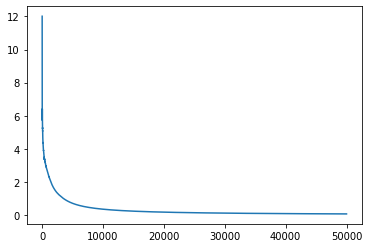

In [8]:
plt.plot(list(range(num_iterations)), avg_train_loss)

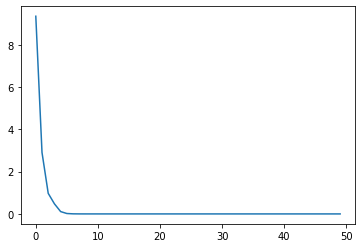

In [9]:
plt.plot(list(range(len(avg_test_loss))), avg_test_loss)